In [3]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/virgins?/virgincollection.xlsx', 'virgin')

In [5]:


# To apply a function to each row and create a new column based on row data
df['Condition'] = df.apply(lambda row: 'Non-Virgin' if row['Number of pregnant flies'] > 0 else 'Virgin', axis=1)
                           


In [6]:


# create contingency table
contingency_table = pd.crosstab(df['Condition'], df['Pupae?'])

contingency_table

Pupae?,N,Y
Condition,,
Non-Virgin,0,144
Virgin,689,12


In [7]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)

pval

2.5137330108111475e-167

In [8]:
# need it in long format for seaborn 

contingency_table.reset_index().melt(id_vars='Condition')

,Condition,Pupae?,value
0,Non-Virgin,N,0
1,Virgin,N,689
2,Non-Virgin,Y,144
3,Virgin,Y,12


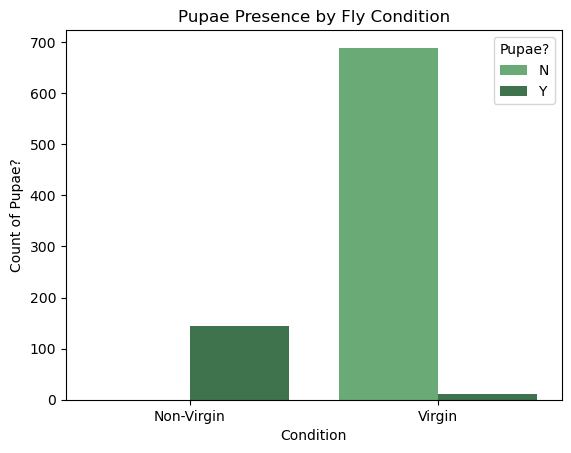

In [9]:
# converting the contingency table into 'long' format using melt, which is necessary for seaborn's barplot function

sns.barplot(data=contingency_table.reset_index().melt(id_vars='Condition'), x='Condition', y='value', hue='Pupae?', palette='Greens_d')
plt.title('Pupae Presence by Fly Condition')
plt.xlabel('Condition')
plt.ylabel('Count of Pupae?')
plt.show()

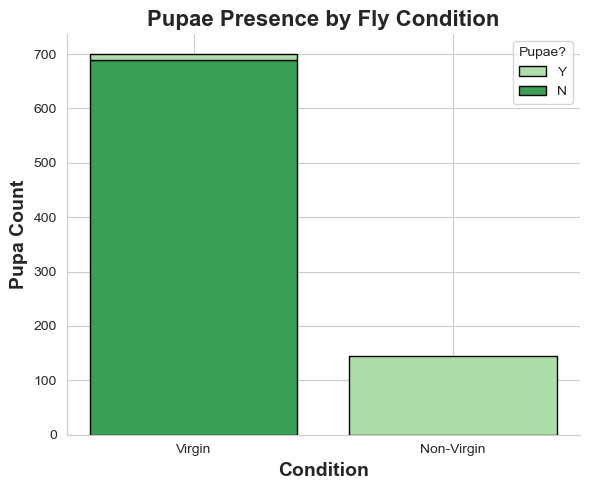

In [16]:
# In this script, we're using sns.histplot which is a high-level seaborn function for histogram plots 
# and can stack bars if given categorical data. 
# The parameter multiple='stack' tells seaborn to stack the bars rather than showing them side by side

df['Condition'] = df.apply(lambda row: 'Non-Virgin' if row['Number of pregnant flies'] > 0 else 'Virgin', axis=1)

plt.figure(figsize=(6, 5))
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the stacked bar chart

sns.histplot(data=df, x='Condition', hue='Pupae?', multiple='stack', shrink=.8, edgecolor='black', palette='Greens', alpha=1)

# Add the title and labels
plt.title('Pupae Presence by Fly Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condition', fontsize=14, fontweight='bold')
plt.ylabel('Pupa Count', fontsize=14, fontweight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Pupa_virgin_pregnant.png', dpi=300, bbox_inches='tight')
plt.show()




In [30]:
total_virgin = len(df[df['Condition'] == 'Virgin'])

virgin_pupa = len(df[(df['Condition'] == 'Virgin') & (df['Pupae?'] == 'Y')])

total_nonvirgin = len(df[df['Condition'] == 'Non-Virgin'])

nonvirgin_pupa = len(df[(df['Condition'] == 'Non-Virgin') & (df['Pupae?'] == 'Y')])

ratio_virgin = virgin_pupa / total_virgin

ratio_nonvirgin = nonvirgin_pupa / total_nonvirgin


0.017118402282453638

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


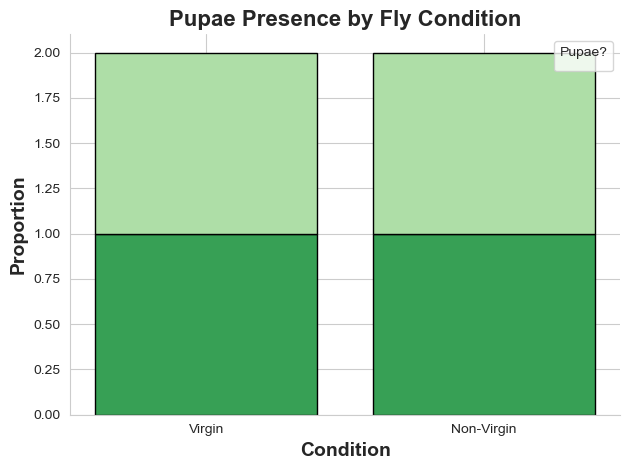

In [64]:
data_for_plotting = data_for_plotting.sort_values(by='Pupae?')

sns.histplot(data=data_for_plotting, x='Condition', hue='Pupae?', multiple='stack', shrink=.8, edgecolor='black', palette='Greens', alpha=1)
plt.title('Pupae Presence by Fly Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condition', fontsize=14, fontweight='bold')
plt.ylabel('Proportion', fontsize=14, fontweight='bold')

plt.legend(title='Pupae?', loc='upper right')

sns.despine()
plt.tight_layout()


plt.show()

In [31]:
data_for_plotting

,Condition,Pupae?,Proportion
0,Virgin,Pupa Present,0.017118
1,Non-Virgin,Pupa Present,1.000000
2,Virgin,Pupa Absent,0.982882
3,Non-Virgin,Pupa Absent,0.000000


In [70]:
data_for_plotting = data_for_plotting.sort_values(by=['Condition'], ascending=[False])

data_for_plotting

,Condition,Pupae?,Proportion
0,Virgin,Pupa Present,0.017118
2,Virgin,Pupa Absent,0.982882
1,Non-Virgin,Pupa Present,1.000000
3,Non-Virgin,Pupa Absent,0.000000


In [72]:
data_for_plotting['Pupae?'].dtypes

CategoricalDtype(categories=['Pupa Present', 'Pupa Absent'], ordered=False)

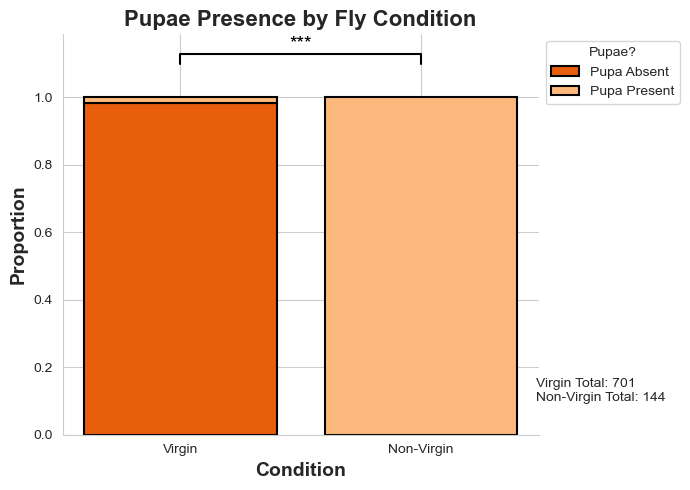

In [115]:


plt.figure(figsize=(7, 5))
sns.histplot(data=data_for_plotting, x='Condition', hue='Pupae?', weights='Proportion', multiple='stack', shrink=.8, edgecolor='black', linewidth=1.5, palette='Oranges', alpha=1)
plt.title('Pupae Presence by Fly Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condition', fontsize=14, fontweight='bold')
plt.ylabel('Proportion', fontsize=14, fontweight='bold')


labels= ['Pupa Absent', 'Pupa Present']
plt.legend(labels, title='Pupae?', bbox_to_anchor=(1, 1), title_fontsize='10')

sns.despine()


x1, x2 = 0, 1  
y, h, col = data_for_plotting['Proportion'].max() + 0.1, 0.03, 'black'  # You may need to adjust the y value based on your data

# Draw the line
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Add asterisks for significance
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col, fontsize=14)

plt.tight_layout()

# annotate with the n number for each 
plt.annotate('Virgin Total: 701\nNon-Virgin Total: 144', xy=(1.48, 0.1))

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Proportion_Pupa_virgin_pregnant.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.legend(title='Pupae?', loc='upper right')

In [11]:
mean_pupa_virgin = df[df['Condition'] == 'Virgin']['Number of Pupae'].mean()

mean_pupa_virgin
# CHECK .MEAN IFNORE NAN VALUES - CHECK 

34.083333333333336

In [12]:
mean_pupa_preg = df[df['Condition'] == 'Pregnant']['Number of Pupae'].mean()
mean_pupa_preg

nan

In [13]:

from scipy.stats import ttest_ind

# Load your DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your actual data loading method

# Drop NaN values in 'Number of Pupae' column for accurate comparison
virgin_pupae = df[df['Condition'] == 'Virgin']['Number of Pupae'].dropna()
pregnant_pupae = df[df['Condition'] == 'Pregnant']['Number of Pupae'].dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(virgin_pupae, pregnant_pupae)

p_value


nan